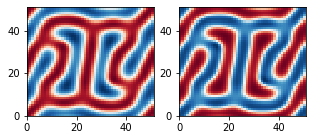

In [40]:
import numpy as np
import matplotlib.pyplot as plt

N=50
Nhalf = int(N/2)
Nt =10000
tau = 1.0 #时间步长
h = 1.0 #空间步长
Du, Dv, f, r = 0.16, 0.08, 0.060, 0.062
#Du, Dv, F, K = 0.14, 0.06, 0.035, 0.065


Au = Du*tau/h**2
Av = Dv*tau/h**2

U = np.zeros((N+1, N+1, Nt+1), dtype=float)
V = np.zeros((N+1, N+1, Nt+1), dtype=float)

# initialization
U[:,:,0] = U[:,:,0] + 0.02*np.random.random((N+1,N+1))
V[:,:,0] = V[:,:,0] + 0.02*np.random.random((N+1,N+1))
U[Nhalf-16:Nhalf+16,Nhalf-16:Nhalf+16,0] = 0.50
V[Nhalf-16:Nhalf+16,Nhalf-16:Nhalf+16,0] = 0.25

for k in range(Nt):     
    U[1:N,1:N,k+1] = (1-4.0*Au)*U[1:N,1:N,k]+ \
              Au*(U[2:N+1,1:N,k]+U[0:N-1,1:N,k]+U[1:N,2:N+1,k]+U[1:N,0:N-1,k])-\
              tau*U[1:N,1:N,k]*V[1:N,1:N,k]*V[1:N,1:N,k]+tau*f*(1.0-U[1:N,1:N,k])        
        
    V[1:N,1:N,k+1] = (1-4.0*Av)*V[1:N,1:N,k]+ \
              Av*(V[2:N+1,1:N,k]+V[0:N-1,1:N,k]+V[1:N,2:N+1,k]+V[1:N,0:N-1,k])+\
              tau*U[1:N,1:N,k]*V[1:N,1:N,k]*V[1:N,1:N,k]-tau*(f+r)*V[1:N,1:N,k]    
  
    U[1:N,0,k+1] = U[1:N,N-1,k+1]
    U[1:N,N,k+1] = U[1:N,1,k+1]
    V[1:N,0,k+1] = V[1:N,N-1,k+1]
    V[1:N,N,k+1] = V[1:N,1,k+1]

    U[0,0:N+1,k+1] = U[N-1,0:N+1,k+1]
    U[N,0:N+1,k+1] = U[1,0:N+1,k+1]
    V[0,0:N+1,k+1] = V[N-1,0:N+1,k+1]
    V[N,0:N+1,k+1] = V[1,0:N+1,k+1]
                
fig = plt.figure(figsize=(5,2.))
ax1 =fig.add_subplot(1,2,1)
ax2 =fig.add_subplot(1,2,2)
#plt.axis('tight')
levels = np.arange(0.0,1.0,0.01)

#ax1.pcolor(U[:,:,Nt].reshape((N+1, N+1)),vmin=0.0, vmax=1.0,cmap=plt.cm.RdBu)
#ax2.pcolor(V[:,:,Nt].reshape((N+1, N+1)),vmin=0.0, vmax=1.0,cmap=plt.cm.RdBu)

ax1.pcolor(U[:,:,Nt].reshape((N+1, N+1)),cmap=plt.cm.RdBu)
ax2.pcolor(V[:,:,Nt].reshape((N+1, N+1)),cmap=plt.cm.RdBu)


plt.show()